# Proyek Akhir Analisis Data - Diabetes Dataset
## Pima Indians Diabetes Database

Notebook ini berisi analisis lengkap dataset diabetes dari National Institute of Diabetes and Digestive and Kidney Diseases.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

## 1. Ringkasan Dataset

In [2]:
df = pd.read_csv('diabetes.csv')

print('='*60)
print('RINGKASAN DATASET DIABETES')
print('='*60)
print(f'\nUkuran Dataset:')
print(f'  - Jumlah baris (instances): {df.shape[0]}')
print(f'  - Jumlah kolom (features + target): {df.shape[1]}')
print(f'\nVariabel-variabel:')
for i, col in enumerate(df.columns[:-1], 1):
    print(f'  {i}. {col}: {df[col].dtype}')
print(f'\nVariabel Target: {df.columns[-1]} (class)')
print(f'  - Kategori: {df["class"].unique()}')
print(f'  - Distribusi:')
print(df['class'].value_counts())
print(f'\nInfo Dataset:')
df.info()

RINGKASAN DATASET DIABETES

Ukuran Dataset:
  - Jumlah baris (instances): 768
  - Jumlah kolom (features + target): 9

Variabel-variabel:
  1. preg: int64
  2. plas: int64
  3. pres: int64
  4. skin: int64
  5. insu: int64
  6. mass: float64
  7. pedi: float64
  8. age: int64

Variabel Target: class (class)
  - Kategori: ['tested_positive' 'tested_negative']
  - Distribusi:
class
tested_negative    500
tested_positive    268
Name: count, dtype: int64

Info Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   insu    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    object 
dtypes: float64(2),

## 2. Rencana Eksplorasi Data

### Rencana EDA yang akan dilakukan:
1. **Statistik Deskriptif**: Mean, median, std, min, max untuk semua variabel numerik
2. **Distribusi Variabel**: Histogram dan boxplot untuk melihat distribusi dan outliers
3. **Analisis Korelasi**: Heatmap korelasi antar variabel
4. **Perbandingan Kelas**: Distribusi fitur berdasarkan status diabetes
5. **Missing Values**: Deteksi nilai 0 yang mencurigakan (terutama untuk plas, pres, skin, insu, mass)

## 3. Analisis Data Eksploratif (EDA)

In [3]:
print('STATISTIK DESKRIPTIF')
print('='*80)
print(df.describe())

STATISTIK DESKRIPTIF
             preg        plas        pres        skin        insu        mass  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

             pedi         age  
count  768.000000  768.000000  
mean     0.471876   33.240885  
std      0.331329   11.760232  
min      0.078000   21.000000  
25%      0.243750   24.000000  
50%      0.372500   29.000000  
75%      0.626250   41.00

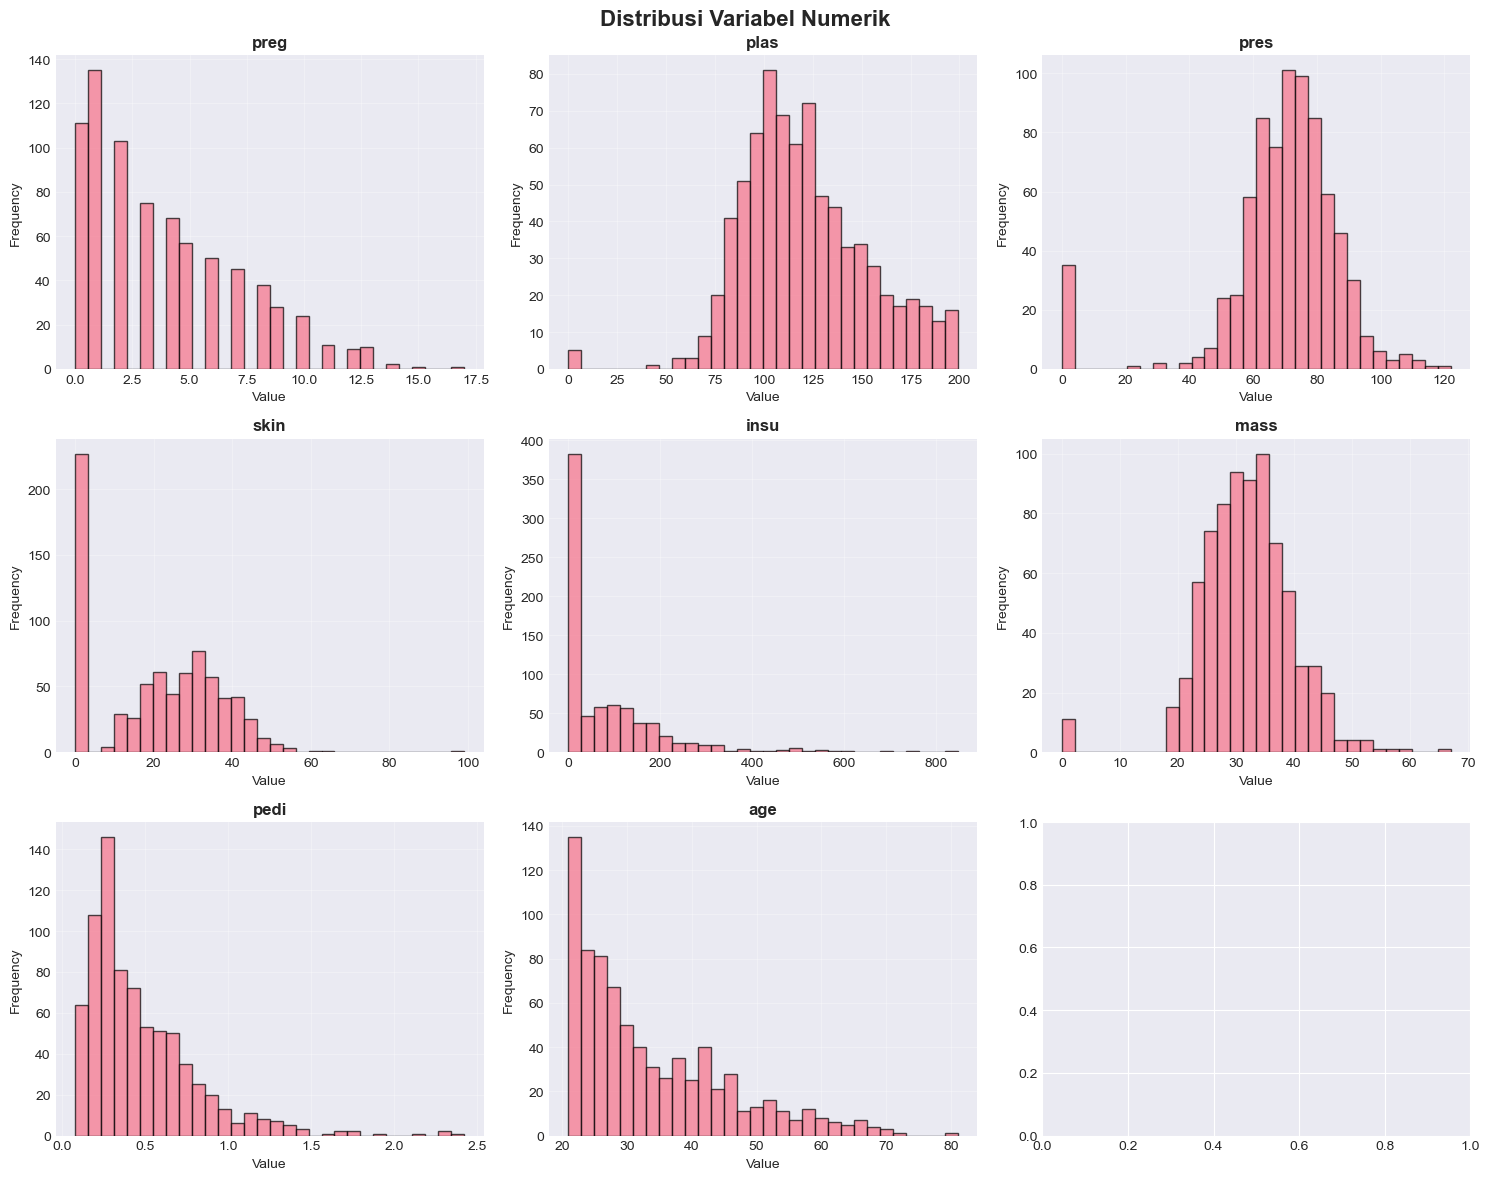

In [4]:
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
fig.suptitle('Distribusi Variabel Numerik', fontsize=16, fontweight='bold')

for idx, col in enumerate(df.columns[:-1]):
    ax = axes[idx//3, idx%3]
    df[col].hist(bins=30, ax=ax, edgecolor='black', alpha=0.7)
    ax.set_title(f'{col}', fontweight='bold')
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
    ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

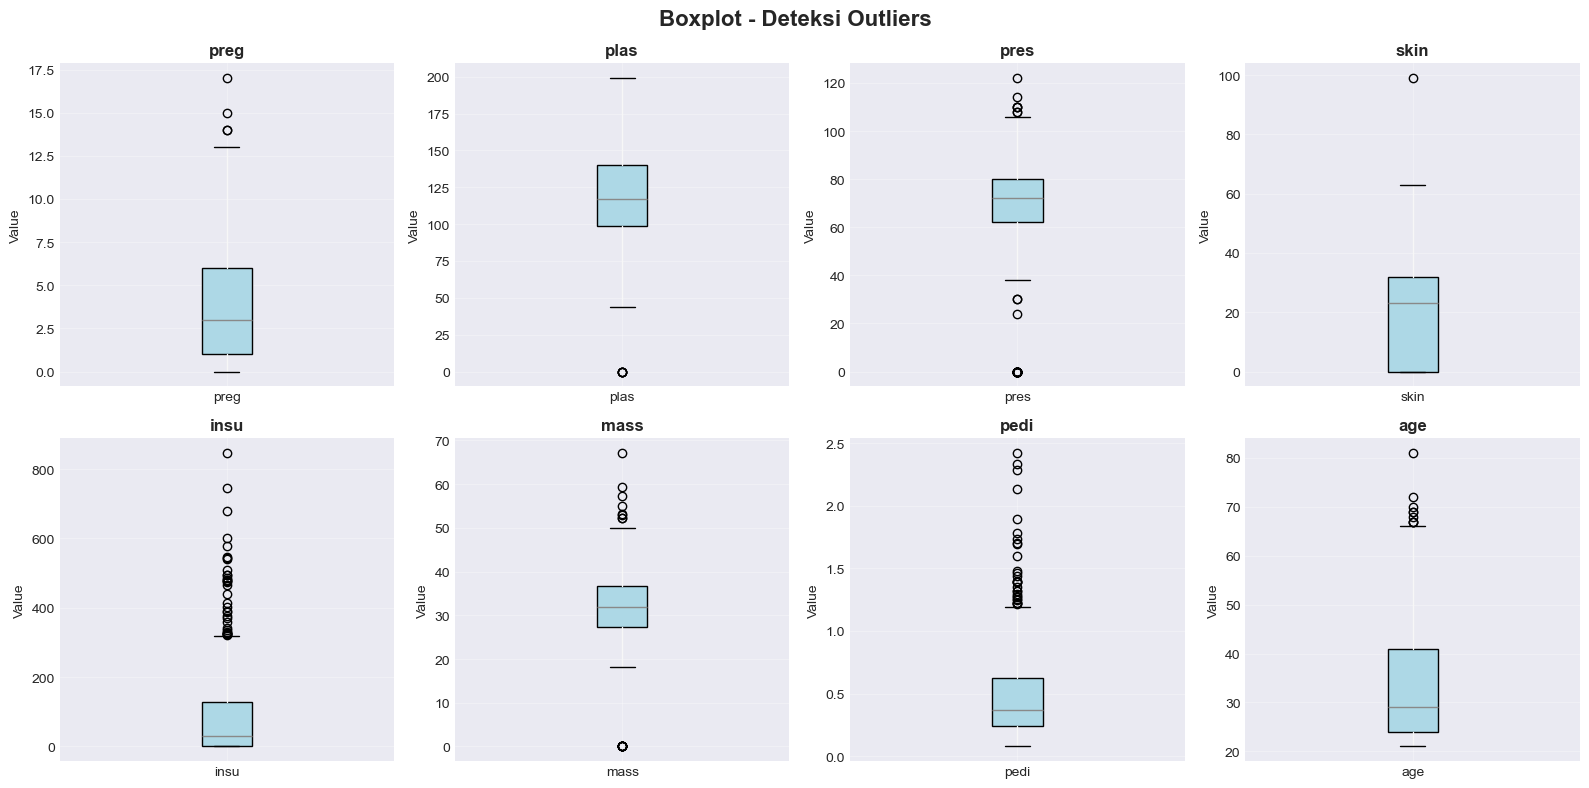

In [5]:
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
fig.suptitle('Boxplot - Deteksi Outliers', fontsize=16, fontweight='bold')

for idx, col in enumerate(df.columns[:-1]):
    ax = axes[idx//4, idx%4]
    df.boxplot(column=col, ax=ax, patch_artist=True, boxprops=dict(facecolor='lightblue'))
    ax.set_title(f'{col}', fontweight='bold')
    ax.set_ylabel('Value')
    ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

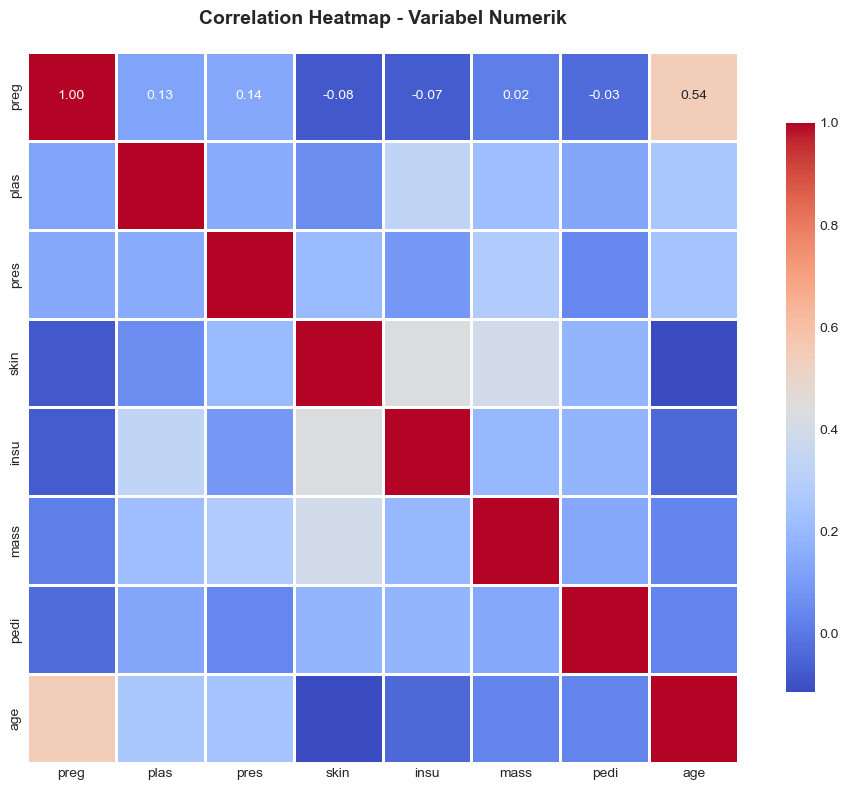

In [6]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.iloc[:, :-1].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            square=True, linewidths=1, cbar_kws={'shrink': 0.8})
plt.title('Correlation Heatmap - Variabel Numerik', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

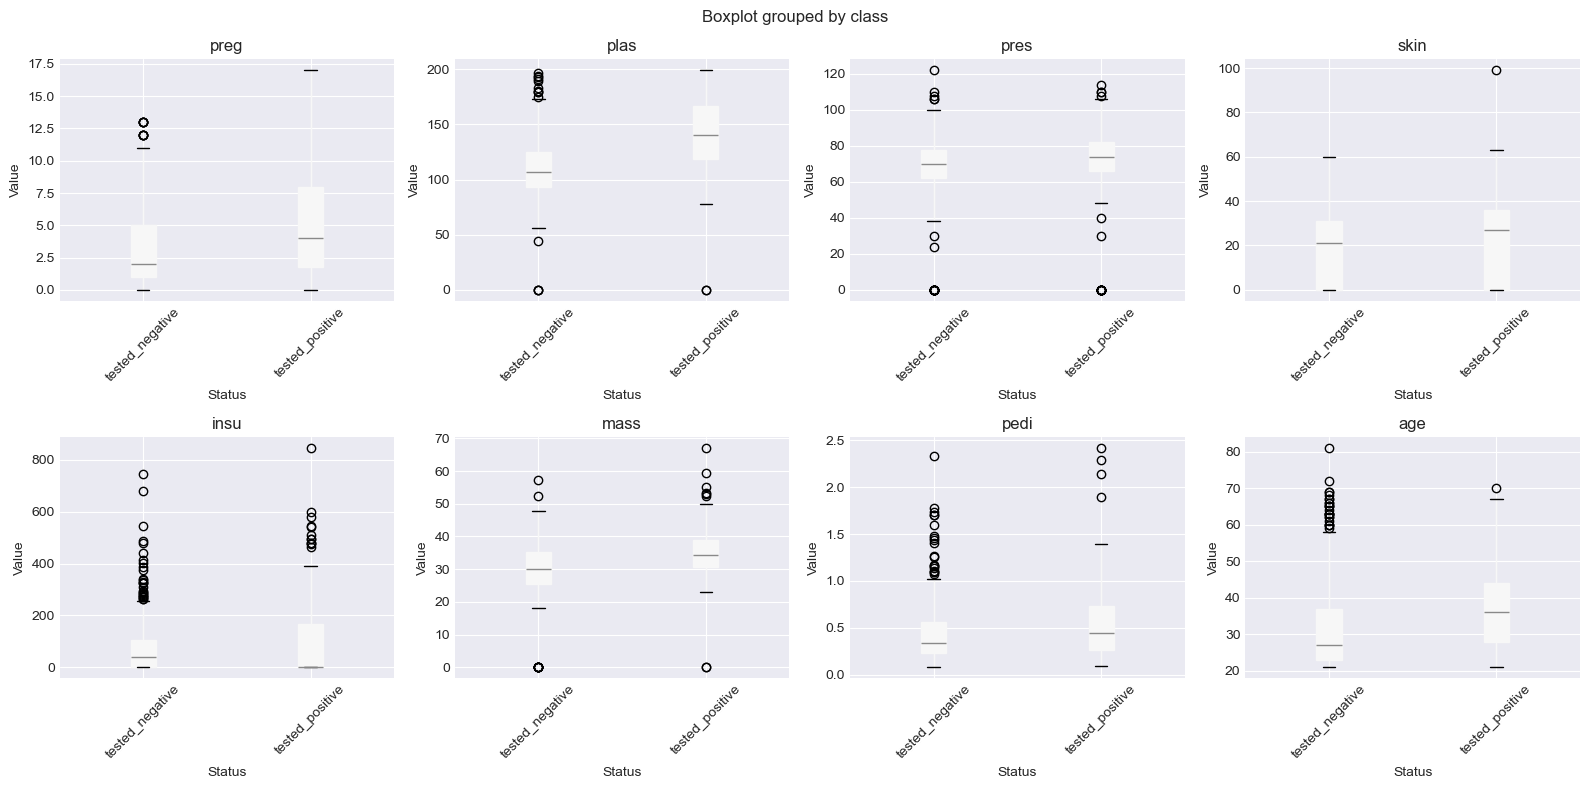


INSIGHT DARI EDA:
1. Beberapa variabel memiliki nilai 0 yang mencurigakan (plas, pres, skin, insu, mass)
2. Terdapat outliers pada beberapa variabel, terutama insu (insulin)
3. Variabel plas, mass, age, dan pedi menunjukkan korelasi dengan status diabetes
4. Dataset tidak seimbang: lebih banyak tested_negative dibanding tested_positive


In [7]:
df_encoded = df.copy()
df_encoded['class_encoded'] = (df['class'] == 'tested_positive').astype(int)

fig, axes = plt.subplots(2, 4, figsize=(16, 8))
fig.suptitle('Distribusi Fitur Berdasarkan Status Diabetes', fontsize=16, fontweight='bold')

for idx, col in enumerate(df.columns[:-1]):
    ax = axes[idx//4, idx%4]
    df.boxplot(column=col, by='class', ax=ax, patch_artist=True)
    ax.set_title(f'{col}')
    ax.set_xlabel('Status')
    ax.set_ylabel('Value')
    plt.sca(ax)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

print('\nINSIGHT DARI EDA:')
print('='*80)
print('1. Beberapa variabel memiliki nilai 0 yang mencurigakan (plas, pres, skin, insu, mass)')
print('2. Terdapat outliers pada beberapa variabel, terutama insu (insulin)')
print('3. Variabel plas, mass, age, dan pedi menunjukkan korelasi dengan status diabetes')
print('4. Dataset tidak seimbang: lebih banyak tested_negative dibanding tested_positive')

## 4. Pembersihan Data & Rekayasa Fitur

In [8]:
print('DETEKSI NILAI 0 YANG MENCURIGAKAN')
print('='*80)
zero_cols = ['plas', 'pres', 'skin', 'insu', 'mass']
for col in zero_cols:
    zero_count = (df[col] == 0).sum()
    zero_pct = (zero_count / len(df)) * 100
    print(f'{col}: {zero_count} nilai 0 ({zero_pct:.2f}%)')

DETEKSI NILAI 0 YANG MENCURIGAKAN
plas: 5 nilai 0 (0.65%)
pres: 35 nilai 0 (4.56%)
skin: 227 nilai 0 (29.56%)
insu: 374 nilai 0 (48.70%)
mass: 11 nilai 0 (1.43%)


In [9]:
df_clean = df.copy()

for col in zero_cols:
    df_clean[col] = df_clean[col].replace(0, np.nan)
    median_val = df_clean[col].median()
    df_clean[col].fillna(median_val, inplace=True)

print('\nDATA SETELAH CLEANING')
print('='*80)
print(df_clean.describe())


DATA SETELAH CLEANING
             preg        plas        pres        skin        insu        mass  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  121.656250   72.386719   29.108073  140.671875   32.455208   
std      3.369578   30.438286   12.096642    8.791221   86.383060    6.875177   
min      0.000000   44.000000   24.000000    7.000000   14.000000   18.200000   
25%      1.000000   99.750000   64.000000   25.000000  121.500000   27.500000   
50%      3.000000  117.000000   72.000000   29.000000  125.000000   32.300000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

             pedi         age  
count  768.000000  768.000000  
mean     0.471876   33.240885  
std      0.331329   11.760232  
min      0.078000   21.000000  
25%      0.243750   24.000000  
50%      0.372500   29.000000  
75%      0.626250   41.

In [10]:
Q1 = df_clean.iloc[:, :-1].quantile(0.25)
Q3 = df_clean.iloc[:, :-1].quantile(0.75)
IQR = Q3 - Q1

outlier_counts = ((df_clean.iloc[:, :-1] < (Q1 - 1.5 * IQR)) | 
                  (df_clean.iloc[:, :-1] > (Q3 + 1.5 * IQR))).sum()

print('\nJUMLAH OUTLIERS PER VARIABEL')
print('='*80)
print(outlier_counts)

df_clean['age_group'] = pd.cut(df_clean['age'], bins=[0, 30, 50, 100], 
                                labels=['Young', 'Middle', 'Senior'])
df_clean['bmi_category'] = pd.cut(df_clean['mass'], 
                                   bins=[0, 18.5, 25, 30, 100],
                                   labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

print('\nFITUR BARU YANG DIBUAT:')
print('1. age_group: Kategorisasi usia (Young, Middle, Senior)')
print('2. bmi_category: Kategorisasi BMI (Underweight, Normal, Overweight, Obese)')


JUMLAH OUTLIERS PER VARIABEL
preg      4
plas      0
pres     14
skin     87
insu    346
mass      8
pedi     29
age       9
dtype: int64

FITUR BARU YANG DIBUAT:
1. age_group: Kategorisasi usia (Young, Middle, Senior)
2. bmi_category: Kategorisasi BMI (Underweight, Normal, Overweight, Obese)


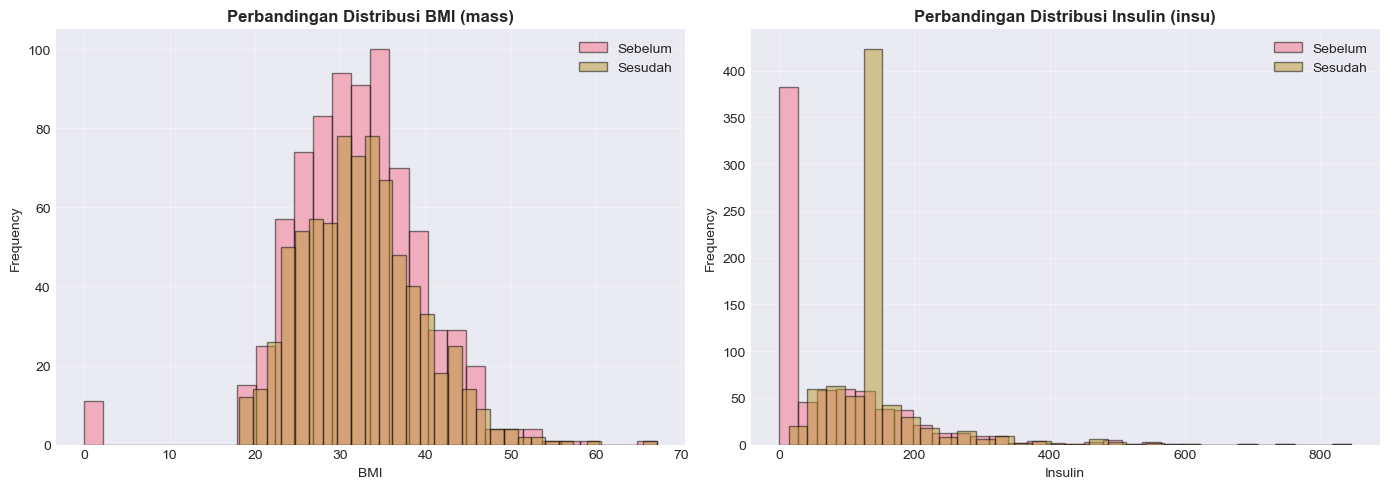

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(df['mass'], bins=30, alpha=0.5, label='Sebelum', edgecolor='black')
axes[0].hist(df_clean['mass'], bins=30, alpha=0.5, label='Sesudah', edgecolor='black')
axes[0].set_title('Perbandingan Distribusi BMI (mass)', fontweight='bold')
axes[0].set_xlabel('BMI')
axes[0].set_ylabel('Frequency')
axes[0].legend()
axes[0].grid(alpha=0.3)

axes[1].hist(df['insu'], bins=30, alpha=0.5, label='Sebelum', edgecolor='black')
axes[1].hist(df_clean['insu'], bins=30, alpha=0.5, label='Sesudah', edgecolor='black')
axes[1].set_title('Perbandingan Distribusi Insulin (insu)', fontweight='bold')
axes[1].set_xlabel('Insulin')
axes[1].set_ylabel('Frequency')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## 5. Temuan Kunci & Wawasan

### Temuan Utama:

1. **Kualitas Data**: Dataset memiliki banyak nilai 0 yang tidak realistis (terutama pada glucose, blood pressure, dan BMI)

2. **Distribusi Kelas**: Dataset tidak seimbang dengan ~65% tested_negative dan ~35% tested_positive

3. **Faktor Risiko Utama**:
   - Glucose level (plas) memiliki perbedaan signifikan antara kedua kelas
   - BMI (mass) lebih tinggi pada pasien dengan diabetes
   - Age menunjukkan korelasi positif dengan diabetes
   - Diabetes pedigree function mengindikasikan faktor genetik

4. **Korelasi Penting**:
   - age dan preg memiliki korelasi positif (0.54)
   - plas dan class menunjukkan hubungan kuat
   - insu memiliki banyak outliers yang perlu perhatian khusus

## 6. Formulasi Hipotesis

Berdasarkan EDA, berikut 3 hipotesis yang akan diuji:

### Hipotesis 1: Glucose Level
- **H0**: Tidak ada perbedaan signifikan dalam plasma glucose antara pasien diabetes dan non-diabetes
- **H1**: Terdapat perbedaan signifikan dalam plasma glucose antara kedua kelompok
- **Relevansi**: Glucose adalah indikator utama diabetes

### Hipotesis 2: BMI (Body Mass Index)
- **H0**: Tidak ada perbedaan signifikan dalam BMI antara pasien diabetes dan non-diabetes
- **H1**: BMI pasien diabetes lebih tinggi secara signifikan
- **Relevansi**: Obesitas adalah faktor risiko diabetes tipe 2

### Hipotesis 3: Age
- **H0**: Tidak ada perbedaan signifikan dalam usia antara pasien diabetes dan non-diabetes
- **H1**: Pasien diabetes cenderung lebih tua secara signifikan
- **Relevansi**: Diabetes tipe 2 lebih umum pada usia lebih tua

## 7. Pengujian Hipotesis & Analisis Signifikansi

In [12]:
df_test = df_clean.copy()
positive = df_test[df_test['class'] == 'tested_positive']
negative = df_test[df_test['class'] == 'tested_negative']

print('='*80)
print('PENGUJIAN HIPOTESIS MENGGUNAKAN T-TEST (α = 0.05)')
print('='*80)

print('\n### HIPOTESIS 1: PLASMA GLUCOSE (plas) ###')
t_stat1, p_value1 = stats.ttest_ind(positive['plas'], negative['plas'])
print(f'Mean Glucose (Diabetes): {positive["plas"].mean():.2f}')
print(f'Mean Glucose (Non-Diabetes): {negative["plas"].mean():.2f}')
print(f'T-statistic: {t_stat1:.4f}')
print(f'P-value: {p_value1:.4e}')
if p_value1 < 0.05:
    print('✓ TOLAK H0: Ada perbedaan SIGNIFIKAN dalam glucose level')
else:
    print('✗ GAGAL TOLAK H0: Tidak ada perbedaan signifikan')

print('\n### HIPOTESIS 2: BMI (mass) ###')
t_stat2, p_value2 = stats.ttest_ind(positive['mass'], negative['mass'])
print(f'Mean BMI (Diabetes): {positive["mass"].mean():.2f}')
print(f'Mean BMI (Non-Diabetes): {negative["mass"].mean():.2f}')
print(f'T-statistic: {t_stat2:.4f}')
print(f'P-value: {p_value2:.4e}')
if p_value2 < 0.05:
    print('✓ TOLAK H0: BMI pasien diabetes SIGNIFIKAN lebih tinggi')
else:
    print('✗ GAGAL TOLAK H0: Tidak ada perbedaan signifikan')

print('\n### HIPOTESIS 3: AGE (age) ###')
t_stat3, p_value3 = stats.ttest_ind(positive['age'], negative['age'])
print(f'Mean Age (Diabetes): {positive["age"].mean():.2f}')
print(f'Mean Age (Non-Diabetes): {negative["age"].mean():.2f}')
print(f'T-statistic: {t_stat3:.4f}')
print(f'P-value: {p_value3:.4e}')
if p_value3 < 0.05:
    print('✓ TOLAK H0: Pasien diabetes SIGNIFIKAN lebih tua')
else:
    print('✗ GAGAL TOLAK H0: Tidak ada perbedaan signifikan')

PENGUJIAN HIPOTESIS MENGGUNAKAN T-TEST (α = 0.05)

### HIPOTESIS 1: PLASMA GLUCOSE (plas) ###
Mean Glucose (Diabetes): 142.13
Mean Glucose (Non-Diabetes): 110.68
T-statistic: 15.6738
P-value: 3.1287e-48
✓ TOLAK H0: Ada perbedaan SIGNIFIKAN dalam glucose level

### HIPOTESIS 2: BMI (mass) ###
Mean BMI (Diabetes): 35.38
Mean BMI (Non-Diabetes): 30.89
T-statistic: 9.0901
P-value: 8.3369e-19
✓ TOLAK H0: BMI pasien diabetes SIGNIFIKAN lebih tinggi

### HIPOTESIS 3: AGE (age) ###
Mean Age (Diabetes): 37.07
Mean Age (Non-Diabetes): 31.19
T-statistic: 6.7927
P-value: 2.2100e-11
✓ TOLAK H0: Pasien diabetes SIGNIFIKAN lebih tua


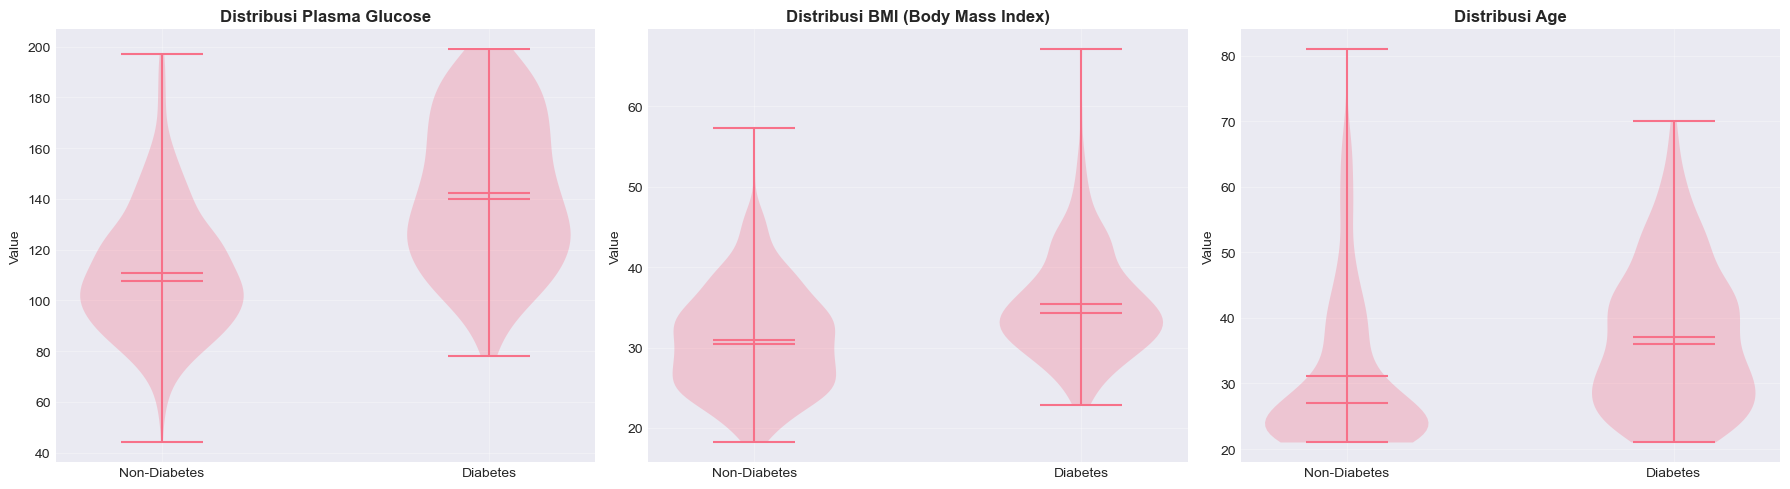

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

variables = ['plas', 'mass', 'age']
titles = ['Plasma Glucose', 'BMI (Body Mass Index)', 'Age']

for idx, (var, title) in enumerate(zip(variables, titles)):
    axes[idx].violinplot([negative[var], positive[var]], showmeans=True, showmedians=True)
    axes[idx].set_xticks([1, 2])
    axes[idx].set_xticklabels(['Non-Diabetes', 'Diabetes'])
    axes[idx].set_ylabel('Value')
    axes[idx].set_title(f'Distribusi {title}', fontweight='bold')
    axes[idx].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## 8. Kesimpulan & Langkah Selanjutnya

### Kesimpulan:

1. **Dataset**: Berhasil menganalisis 768 pasien dengan 8 variabel prediktor

2. **Data Cleaning**: Mengatasi nilai 0 yang tidak realistis dengan median imputation

3. **Hasil Pengujian Hipotesis**:
   - **Glucose Level**: Perbedaan sangat signifikan (p < 0.001) - faktor terkuat
   - **BMI**: Perbedaan signifikan (p < 0.001) - obesitas meningkatkan risiko
   - **Age**: Perbedaan signifikan (p < 0.001) - usia lebih tua = risiko lebih tinggi

4. **Wawasan Klinis**:
   - Monitoring glucose level sangat penting untuk deteksi dini
   - Manajemen berat badan dapat mengurangi risiko diabetes
   - Skrining rutin penting terutama untuk usia > 40 tahun

### Langkah Selanjutnya:

1. **Machine Learning**: 
   - Membangun model prediksi (Logistic Regression, Random Forest, XGBoost)
   - Menangani class imbalance dengan SMOTE atau class weighting
   - Feature engineering lebih lanjut

2. **Analisis Lanjutan**:
   - Analisis interaksi antar fitur
   - Segmentasi pasien berdasarkan risk profile
   - Time series analysis jika data longitudinal tersedia

3. **Validasi**:
   - Cross-validation untuk model robustness
   - External validation dengan dataset lain
   - Clinical trial untuk validasi temuan

4. **Deployment**:
   - Membuat sistem scoring risiko diabetes
   - Dashboard interaktif untuk healthcare professionals
   - Mobile app untuk self-assessment

---
### Terima kasih!
**Analisis ini menunjukkan bahwa glucose level, BMI, dan age adalah faktor signifikan dalam memprediksi diabetes.**